In [45]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt



In [46]:

def create_tema(stock: pd.DataFrame, MA_period:int ) -> pd.Series:

    ema1 = ta.ema(stock['Close'], length=MA_period)

    # Calculate the second EMA
    ema2 = ta.ema(ema1, length=MA_period)

    # Calculate the third EMA
    ema3 = ta.ema(ema2, length=MA_period)

    # Calculate TEMA
    tema = 3 * (ema1 - ema2) + ema3
    #stock[f'tema_{MA_period}'] = tema
    return tema



In [47]:

# Define your custom strategy using CustomStrategy
CustomStrategy = ta.Strategy(
    name="Customize technical indicator",
    description="adding TI",
    ta=[
        {"kind": "natr", 'length':3 },
        {"kind": "rsi", 'length':3 },
        {"kind": "adx", 'length':3 },
        {"kind": "cci", 'length':3 },
        {"kind": "roc", 'length':3 },
        {"kind": "stoch", 'length':3 },
        {"kind": "willr", 'length':3 },
        {"kind": "obv"},
        {"kind": "macd"},
        {"kind": "bbands", 'length':3},
    ]
)

In [48]:
def create_min_max_mid_price(stock: pd.DataFrame, period:int ) -> pd.Series:
    stock[f'min_price_{period}'] = stock['Low'].rolling(window=period).min()
    stock[f'max_price_{period}'] = stock['High'].rolling(window=period).max()
    stock['mid_price'] = (stock['High'] + stock['Low']) / 2


In [49]:
def calculate_MA_smoothness( ma:pd.Series):
    diff_i = ma -ma.shift(1)
    diff_i = diff_i.dropna()
    smooth =(diff_i-diff_i.shift(1)).dropna()
    smooth = smooth.abs().mean()
    return smooth
def calculate_MA_lag(stock: pd.DataFrame, ma:pd.Series):
    lag = (stock['Close']-ma).dropna()
    lag= lag.abs().mean()
    return lag

In [50]:
df = pd.DataFrame()
#data = pd.read_csv('/Users/hieudao/Desktop/ai/do_an/datas/AAPL_stock.csv')
test = df.ta.ticker("googl")
test.ta.strategy(CustomStrategy)
create_min_max_mid_price(test, 3)
test['tema_2'] = create_tema(test, 2)
test['tema_100'] = create_tema(test,100)
test.tail(1)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,NATR_3,RSI_3,ADX_3,...,BBL_3_2.0,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-07 00:00:00-04:00,120.099998,121.050003,119.400002,119.480003,21692600,0.0,0.0,1.937299,36.801333,29.903724,...,118.533047,120.446668,122.360289,3.177541,0.247425,118.400002,122.610001,120.225002,119.464553,126.348083


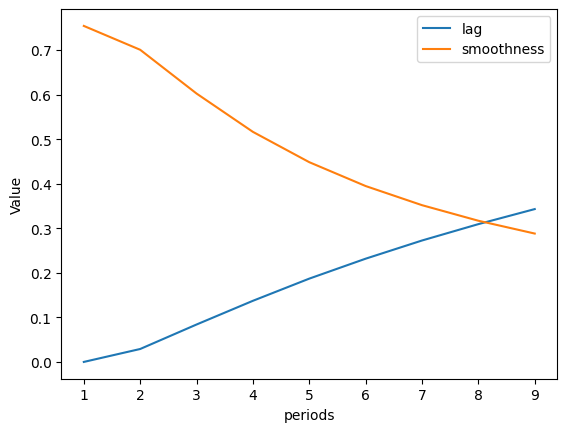

In [51]:
periods = []
lag = []
smoothness = []

for i in range(1,10):
    tema = create_tema(test,i)    
    periods.append(i)
    lag.append(calculate_MA_lag(test, tema))
    smoothness.append(calculate_MA_smoothness(tema))
# Plotting
plt.plot(periods, lag, label='lag')
plt.plot(periods, smoothness, label='smoothness')

plt.xlabel('periods')
plt.ylabel('Value')
plt.legend()
plt.show()

In [52]:
test['tema_8'] = create_tema(test,8)
test

,Open,High,Low,Close,Volume,Dividends,Stock Splits,NATR_3,RSI_3,ADX_3,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
Date,,,,,,,,,,,,,,,,,,,,,
2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.502753,NaN,NaN,NaN
2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.622372,2.610735,NaN,NaN
2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512,0.0,0.0,6.357420,NaN,NaN,...,2.653070,2.855202,15.237605,0.709438,2.401401,2.839840,2.784410,2.733034,NaN,NaN
2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748,0.0,0.0,7.144573,48.516155,NaN,...,2.690857,2.787481,7.181624,0.155968,2.515015,2.839840,2.692317,2.633276,NaN,NaN
2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044,0.0,0.0,5.477596,56.832124,NaN,...,2.671588,2.767945,7.213467,0.401744,2.591842,2.839840,2.651152,2.648975,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 00:00:00-04:00,120.169998,121.080002,119.690002,119.699997,29519700,0.0,0.0,1.925610,47.880285,38.544280,...,119.659999,120.543629,1.476902,0.522633,116.849998,121.080002,120.385002,119.677643,126.127617,118.896210
2023-07-03 00:00:00-04:00,119.239998,120.190002,118.820000,119.900002,14467900,0.0,0.0,1.532510,51.969111,34.240526,...,119.566666,120.246537,1.137225,0.745146,118.300003,121.080002,119.505001,119.912140,126.171657,119.192271
2023-07-05 00:00:00-04:00,119.239998,122.610001,119.230003,121.750000,27584800,0.0,0.0,2.142701,77.001957,37.303969,...,120.449999,122.295716,3.064702,0.852167,118.820000,122.610001,120.920002,121.697906,126.316152,120.397993


In [53]:
abc = test.dropna()
abc

,Open,High,Low,Close,Volume,Dividends,Stock Splits,NATR_3,RSI_3,ADX_3,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-10 00:00:00-05:00,4.867367,4.957457,4.800551,4.881381,301282416,0.0,0.0,3.297238,58.767641,42.870467,...,4.816983,4.958482,5.874972,0.727556,4.697698,4.957457,4.879004,4.883820,3.863238,4.850060
2005-01-11 00:00:00-05:00,4.895395,4.947698,4.834334,4.843343,278069652,0.0,0.0,2.831877,48.714336,37.850269,...,4.858608,4.891431,1.351113,0.267455,4.724224,4.957457,4.891016,4.848029,3.920317,4.842952
2005-01-12 00:00:00-05:00,4.863113,4.903153,4.767267,4.889389,326784888,0.0,0.0,2.792202,60.869291,34.702612,...,4.871371,4.911544,1.649371,0.724253,4.767267,4.957457,4.835210,4.887231,3.977832,4.862860
2005-01-13 00:00:00-05:00,4.889389,4.939690,4.856106,4.888138,273702024,0.0,0.0,2.251429,60.286905,24.983021,...,4.873623,4.916458,1.757837,0.669424,4.767267,4.947698,4.897898,4.889374,4.032997,4.874027
2005-01-14 00:00:00-05:00,4.904905,5.005255,4.858108,5.004254,385226388,0.0,0.0,2.569815,82.969438,31.594403,...,4.927260,5.036150,4.419909,0.853538,4.767267,5.005255,4.931682,5.000285,4.092725,4.941813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 00:00:00-04:00,120.169998,121.080002,119.690002,119.699997,29519700,0.0,0.0,1.925610,47.880285,38.544280,...,119.659999,120.543629,1.476902,0.522633,116.849998,121.080002,120.385002,119.677643,126.127617,118.896210
2023-07-03 00:00:00-04:00,119.239998,120.190002,118.820000,119.900002,14467900,0.0,0.0,1.532510,51.969111,34.240526,...,119.566666,120.246537,1.137225,0.745146,118.300003,121.080002,119.505001,119.912140,126.171657,119.192271
2023-07-05 00:00:00-04:00,119.239998,122.610001,119.230003,121.750000,27584800,0.0,0.0,2.142701,77.001957,37.303969,...,120.449999,122.295716,3.064702,0.852167,118.820000,122.610001,120.920002,121.697906,126.316152,120.397993


In [54]:
test.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'NATR_3', 'RSI_3', 'ADX_3', 'DMP_3', 'DMN_3', 'CCI_3_0.015', 'ROC_3',
       'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3', 'OBV', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'tema_2', 'tema_100', 'tema_8'],
      dtype='object')

In [55]:
correlation_matrix = test.corr()
correlation_scores = correlation_matrix.unstack().sort_values(ascending=False)



In [56]:
test = test.drop(columns=['Dividends', 'MACDh_12_26_9', 'MACDs_12_26_9', 'DMP_3', 'DMN_3', 'Stock Splits'])


In [57]:
test.columns
test = test.dropna()

In [58]:
test.to_csv('clean_google.csv')

In [59]:
test.tail(1)

,Open,High,Low,Close,Volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-07 00:00:00-04:00,120.099998,121.050003,119.400002,119.480003,21692600,1.937299,36.801333,29.903724,-30.094726,-0.35029,...,120.446668,122.360289,3.177541,0.247425,118.400002,122.610001,120.225002,119.464553,126.348083,119.879878
